# Algoritmos de optimización - Seminario<br>

Nombre y Apellidos:

- Julio Emanuel Suriano Bryk
- José Fernández López

Url: https://github.com/.../03MAIR---Algoritmos-de-Optimizacion---2019/tree/master/SEMINARIO

Problema:

> 1.  **Sesiones de doblaje**
> 2.  Organizar los horarios de partidos de La Liga
> 3.  Combinar cifras y operaciones

Descripción del problema:(copiar enunciado)

## Problema 1. Organizar sesiones de doblaje(I)

- Se precisa coordinar el doblaje de una película. Los actores del doblaje deben coincidir en las tomas en las que sus personajes aparecen juntos en las diferentes tomas.
- Los actores de doblaje cobran toda la misma cantidad por cada día que deben desplazarse hasta el estudio de grabación independientemente del número de tomas que se graben.
- No es posible grabar más de 6 tomas por día.
- El objetivo es planificar las sesiones por día de manera que el gasto por los servicios de los actores de doblaje sea el menor posible. Los datos son:

(\*) La respuesta es obligatoria


(\*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>

¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.


**Respuesta**: Este ejercicio presenta una distribución de una combinatoria sin repetición donde el ordern no importa y se deben utilizar todos los elementos.

$$
   C_n^r =
   \binom{n}{r} =

   \frac{n!}{r!  \cdot (n-r)!}
$$

En caso de no tener restricción alguna, la cantidad de posibilidades es igual a:

$$C = n! $$

Tomando en cuenta las restriccion de no mas de 6 tomas por día, la cantidad de posbilidades es de:

$$
   C_n^r =
   \binom{n}{6} =

   \frac{n!}{6!  \cdot (n-6)!}
$$

Suponiendo que tenemos un total de 10 tomas para grabar, los resultados serian:

- Sin restricciones: 3.628.800 posibilidades
- Con no mas de 6 tomas por dia: 210 posibilidades


In [205]:
from math import comb


def bell_number(n):
    if n == 0 or n == 1:
        return 1

    bell = [[0 for i in range(n + 1)] for j in range(n + 1)]
    bell[0][0] = 1

    for i in range(1, n + 1):
        bell[i][0] = bell[i - 1][i - 1]

        for j in range(1, i + 1):
            bell[i][j] = bell[i - 1][j - 1] + bell[i][j - 1]

    return bell[n][0]


def print_bell_numbers(n):
    print(f"Los primeros {n} números de Bell son:")
    for i in range(n):
        print(f"B({i}) = {bell_number(i)}")


# Ejemplo de uso
print_bell_numbers(10)

Los primeros 10 números de Bell son:
B(0) = 1
B(1) = 1
B(2) = 2
B(3) = 5
B(4) = 15
B(5) = 52
B(6) = 203
B(7) = 877
B(8) = 4140
B(9) = 21147


In [229]:
from math import comb


def calculate_bell_number(n):
    if n == 0 or n == 1:
        return 1

    # Implementación de la fórmula B(n) = Σ(k=0 to n-1) C(n-1,k) * B(k)
    res = 0

    for k in range(n):
        res += comb(n - 1, k) * calculate_bell_number(k)

    return res


# Verificación del ejemplo B(3) = 5
print("\nVerificación para B(3):")
print(f"B(3) = {calculate_bell_number(3)}")


Verificación para B(3):


TypeError: 'float' object is not callable

Modelo para el espacio de soluciones<br>
(\*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)


**Respuesta:** Vamos a utilizar una matriz (lista de lista) para representar la tabla de tomas y actores, donde cada item dentro de la lista representa un toma y a su vez, cada toma contiene los actores que participan.

```python
example_schedule = [
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0], # toma 1 con actores 1, 2, 3, 4 y 5
    [0, 0, 1, 1, 1, 0, 0, 0, 0, 0], # toma 1 con actores 3, 4 y 5
    ...
]
```

Para representar el resultado final, es decir la planificacion de sesiones por dia, vamos a utilizar de nuevo una matriz.

```python
result = [
  [0,1,2], # dia 1 con las tomas 1, 2 y 3
  [3,5], # toma 2 con los actores 1 y 4
]
```


Según el modelo para el espacio de soluciones<br>
(\*)¿Cual es la función objetivo?

(\*)¿Es un problema de maximización o minimización?


**Justificación:** Es un problema de minimización donde la función objetivo es obtener una planificación de los actores por día que contemple el menor coste posible.


Funciones Base para los algoritmos


In [168]:
import random

# Taken from demo
test_schedule = [
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 1, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 1, 1, 0, 0],
    [0, 1, 0, 1, 0, 0, 0, 1, 0, 0],
    [1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 1, 0, 0, 1, 0],
    [1, 1, 1, 0, 1, 0, 0, 1, 0, 0],
    [1, 1, 1, 1, 0, 1, 0, 0, 0, 0],
    [1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 1, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 0, 0, 1, 0],
    [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
]


def get_cost(planning: list[list], schedule: list[list]) -> int:
    """Calculate total cost for a given planning

    Args:
        planning (list[list]): array of takes, where each item represents a day
        schedule (list[list]): array of actors per take, where each item represents one take

    Returns:
        int: total cost
    """

    cost = 0

    for day in planning:
        # Obtain array of actors per take
        actors_per_take = [schedule[take] for take in day]

        # Union of all actors in that day: ACTORS_TAKE_1 OR ACTORS_TAKE_2 OR ACTORS_TAKE_N
        actors_in_day = [int(any(i)) for i in zip(*actors_per_take)]

        # Count the actors in that day and multiply by cost
        cost += actors_in_day.count(1)

    return cost


def get_planning(schedule: list[list], max_takes_per_day: int) -> list[list]:
    """Get a random planning given a schedule

    Args:
        schedule (list[list]): schedule of sessions with actors to record
        max_takes_per_day (int): maximum amount of takes per day

    Returns:
        list[list]: possible random planning
    """
    # Get empty planning
    planning = []

    # Use schedule as a set of the ids
    schedule_set = set(range(len(schedule)))

    # continue until we schedule all the takes
    while len(schedule_set) > 0:
        # max amount of takes per day
        max_amount = (
            max_takes_per_day
            if max_takes_per_day <= len(schedule_set)
            else len(schedule_set)
        )

        # having different takes by day
        takes_amount = random.choice(range(1, max_amount)) if max_amount > 1 else 1

        # obtain take id from schedule
        takes = random.sample(list(schedule_set), takes_amount)

        # add them to the planning by day
        planning.append(takes)

        # remove takes from schedule
        schedule_set -= set(takes)

    return planning


test_planning = get_planning(test_schedule, 6)
display(test_planning, get_cost(test_planning, test_schedule))

[[26],
 [8, 12, 3, 6],
 [1, 11],
 [22, 18],
 [23, 15, 29, 2, 13],
 [10, 5],
 [20, 27, 9, 19, 24],
 [28, 16, 0],
 [14],
 [7, 21, 17],
 [25],
 [4]]

60

### Diseña un algoritmo para resolver el problema por fuerza bruta


In [215]:
import itertools
import math


def get_all_planning(takes, max_takes_per_day: int):
    # if there is not takes remaining we return empty plannings
    if len(takes) == 0:
        return [[]]

    res = []

    # iterate over all possible combinations within the takes
    for i in range(1, min(len(takes), max_takes_per_day) + 1):
        for combination in itertools.combinations(takes, i):
            # get the rest of takes outside the combination
            remaining_takes = [take for take in takes if take not in combination]

            # calculate new planning for remaining takes
            for remaining_takes_planning in get_all_planning(
                remaining_takes, max_takes_per_day
            ):
                # create new planning based on original combination and planning
                new_planning = [list(combination)] + remaining_takes_planning

                # sort the planning to avoid duplication
                sorted_planning = sorted(new_planning, key=sorted)

                # if not existing add it to the possible results
                if sorted_planning not in res:
                    res.append(sorted_planning)
    return res


def get_planning_BF(schedule: list[list], max_takes_per_day: int) -> list[list]:
    """get planning for schedule using Brute Force

    Args:
        schedule (list[list]): schedule of takes
        max_takes_per_day (int): _description_

    Returns:
        list[list]: _description_
    """
    best_cost = math.inf
    best_planning = []

    all_planning = get_all_planning(range(len(schedule)), max_takes_per_day)

    print(len(all_planning))

    for curr_plan in all_planning:
        curr_cost = get_cost(curr_plan, schedule)

        if curr_cost < best_cost:
            best_cost = curr_cost
            best_planning = curr_plan

    return best_planning


get_planning_BF(generate_schedule(5, 4), 2)

26


[[0, 3], [1], [2], [4]]

Calcula la complejidad del algoritmo por fuerza bruta


**Respuesta**: El algoritmo por fuerza generate todas las posibles particiones de las tomas dentro de la planificación, por lo que se se puede asumir que sigue la definición de las particiones del [número de Bell](https://es.wikipedia.org/wiki/N%C3%BAmero_de_Bell).

Donde los números de Bell cumplen la [fórmula de Dobinski](https://en.wikipedia.org/wiki/Dobi%C5%84ski%27s_formula):

$$
B_n = {1 \over e}\sum_{k=0}^\infty \frac{k^n}{k!},
$$

Donde:

- $k$: número de elementos máximos por particion (6 para este algoritmo)
- $n$: cantidad de tomas

Esto indica que en el peor de los casos la complejidad computacional toma un valor exponencial.

$$
O(n) = k^n
$$


### Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta.

Argumenta porque crees que mejora el algoritmo por fuerza bruta


In [170]:
def probability(temp: int, dist: int) -> bool:
    return random.random() < math.exp(-1 * dist / temp)


def dec_temp(temp: int) -> int:
    return temp * 0.9999


def split_list(items: list, n_parts: int, max_amount: int) -> list:
    """Split items into different parts"""
    # copy of the list to avoid reference modification
    items_copy = items[:]

    # initialize parts with empty lists
    parts = [[] for _ in range(n_parts)]

    # continue until all the items have been properly distributed
    while items_copy:
        # pop item from array
        item = items_copy.pop()

        # use only available arrays
        available_parts = [
            index for index, value in enumerate(parts) if len(value) < max_amount
        ]

        # get random index and add item
        i = random.choice(available_parts)
        parts[i].append(item)

    return parts


def get_closest(planning: list[list], max_takes_per_day: int) -> list[list]:
    """Get closest random planning by swapping takes"""
    # Making a deep copy of the list to avoid object modification
    planning_copy = [lst[:] for lst in planning]

    # get random days from planning
    i, j = random.sample(range(len(planning)), 2)

    # group all takes into a single array
    all_takes = planning_copy[i] + planning_copy[j]

    # distribute them between the days
    planning_copy[i], planning_copy[j] = split_list(all_takes, 2, max_takes_per_day)

    return planning_copy


get_distance = get_cost


def get_planning_SA(
    schedule: list[list], max_takes_per_day, temp=10000000
) -> list[list]:
    curr_plan = get_planning(schedule, max_takes_per_day)
    curr_plan_dist = get_distance(curr_plan, schedule)

    # max values for possible result
    best_plan = []
    best_plan_dist = 10e10000

    while temp > 0.0001:
        closest = get_closest(curr_plan, max_takes_per_day)
        closest_dist = get_distance(closest, schedule)

        if closest_dist < best_plan_dist:
            best_plan = closest
            best_plan_dist = closest_dist

        dist_diff = abs(curr_plan_dist - closest_dist)
        if closest_dist < curr_plan_dist or probability(temp, dist_diff):
            curr_plan = closest
            curr_plan_dist = closest_dist

        temp = dec_temp(temp)

    return list(filter(lambda day: len(day) > 0, best_plan))

(\*)Calcula la complejidad del algoritmo


**Respuesta:** La complejidad computacional del algoritmo de Recocido Simulado (SA) no tiene una definición única y precisa, ya que depende de varios factores.

En general, si $N$ es el número de iteraciones y $O(n)$ es la complejidad de evaluar la función objetivo, podríamos decir que la complejidad es:

$$O(N,n) = N * O(n)$$

Sin embargo, $N$ no es fijo y depende de las funciones de `dec_temp`, el valor inicial de la tempatura y la condición de parada del `while`.

En este caso nuestra función objetivo `get_cost`, tiene una complejidad computacional de:

$$O(n) = n^2$$

Por lo tanto la complejidad computacional final es de:

$$O(N,n) = N * n^2$$


Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios


In [188]:
def generate_schedule(n_days: int, n_actor: int) -> list[list]:
    # generate empty schedule
    schedule = [[] for _ in list(range(n_days))]

    # iterate over amount of days
    for i in range(n_days):
        # get random numbers of actors
        actors = random.sample(range(n_actor), random.randint(1, n_actor))

        # generate boolean array to store
        take_schedule = [int(j in actors) for j in range(n_actor)]

        # save in schedule
        schedule[i] = take_schedule

    return schedule


# At least 6 takes to 10
n_takes = random.randint(6, 10)

# At least 4 actors to 8
n_actor = random.randint(4, 8)

# Create new schedule
random_schedule = generate_schedule(n_takes, n_actor)
display(
    f"Planificación aleatoria de {n_takes} tomas con {n_actor} actores", random_schedule
)

'Planificación aleatoria de 9 tomas con 6 actores'

[[1, 1, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 0, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 0, 1, 1, 1, 1],
 [0, 1, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 1, 1, 0, 0],
 [1, 1, 1, 1, 1, 1]]

Aplica el algoritmo al juego de datos generado


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

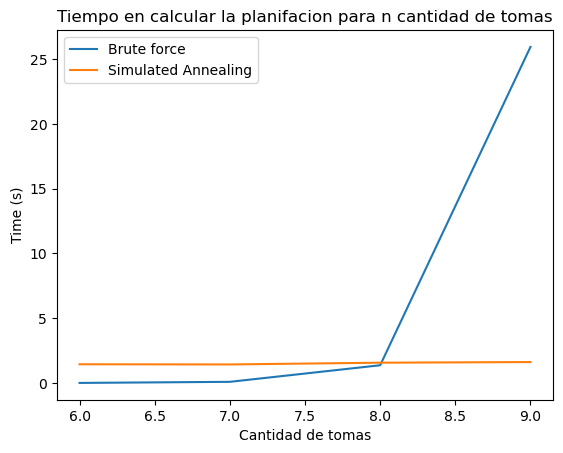

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt
from timeit import timeit

execution_time_bf = []
execution_time_sa = []
input_sizes = list(range(6, 10))

for n in input_sizes:
    random_schedule = generate_schedule(n, 4)
    execution_time_bf.append(
        timeit(
            lambda: get_planning_BF(random_schedule, max_takes_per_day=6),
            number=1,
        )
    )
    execution_time_sa.append(
        timeit(
            lambda: get_planning_SA(random_schedule, max_takes_per_day=6),
            number=1,
        )
    )

sns.lineplot(x=input_sizes, y=execution_time_bf, label="Brute force")
sns.lineplot(x=input_sizes, y=execution_time_sa, label="Simulated Annealing")

plt.xlabel("Cantidad de tomas")
plt.ylabel("Time (s)")
plt.title("Tiempo en calcular la planifacion para n cantidad de tomas")

plt.show()

Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo


**Respuesta**:

- Capítulo de Heuristicas (Recocido Simulado), Guía de la asignatura
- [Número de Bell, Wikipedia](https://es.wikipedia.org/wiki/N%C3%BAmero_de_Bell)
-


Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño


Respuesta
